In [5]:
import os
import time
import functools

import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [6]:
def tensor_to_image(tensor):
    tensor = np.array(tensor * 255, dtype=np.uint8)
    
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    else: 
        raise Exception()
    
    return PIL.Image.fromarray(tensor)

def load_image(image_path):
    max_res = 512

    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    long_side = max(shape)
    scaling_factor = max_res/long_side

    new_shape = tf.cast(shape*scaling_factor, tf.int32)
    image = tf.image.resize(image, new_shape)
    image = image[tf.newaxis, :]

    return image

In [7]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [8]:
stylized_image = model(tf.constant(load_image('content.jpg')), tf.constant(load_image('style.jpg')))[0]

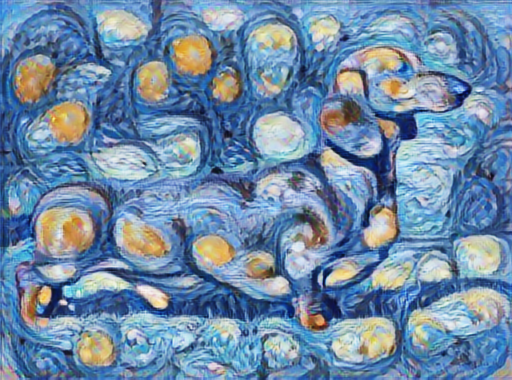

In [9]:
tensor_to_image(stylized_image)